In [68]:
import matplotlib.pyplot as plt

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용 시, 마이너스 기호 깨짐 방지

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 구글드라이브 마운트

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## 필요 라이브러리 임포트
- 추가 사용자 정의함수 불러오기

In [50]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd
import chardet

import time

import folium

# 사용자 정의함수 경로 설정
import sys
# sys.path.append("H:/내 드라이브/_Projects/재정데이터분석_미니프로젝트/Source/_Custom_Function")
sys.path.append("/gdrive/MyDrive/_Projects/재정데이터분석_미니프로젝트/Source/_Custom_Function")

# 사용자 정의함수 불러오기
import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

import dataset_function as ds_f
import folium_function as fl_f
import plot_function as pl_f

### 데이터셋 기본 경로 설정

In [51]:
# 나의 루트 경로 설정
path_dateset = '/gdrive/MyDrive/_Projects/재정데이터분석_미니프로젝트/DataSet/'

### 파일 이름 설정

In [52]:
file_name_1 = '전처리/가해운전자_차량용도별_교차로형태별_교통사고_2020_2023.csv'
file_name_2 = '전처리/가해운전자_차량용도별_도로종류별_교통사고_2020_2023.csv'
file_name_3 = '전처리/가해운전자_차량용도별_도로형태별_교통사고_2020_2023.csv'
file_name_4 = '전처리/가해운전자_차량용도별_연령층별_교통사고_2020_2023.csv'

### 데이터의 행 개수만큼만 읽기
- 대용량 파일의 경우, 파일의 형식을 먼저 확인하기 위해서 사용

In [53]:
er.Read_nrows(path_dateset + file_name_1, 3)

,연도,구분,교차로아님,교차로 - 삼지,교차로 - 사지,교차로 - 오지이상,교차로 - 회전
0,2020,사고[건],574,126,190,6,1
1,2020,사망[명],4,3,3,0,0
2,2020,부상[명],622,148,208,6,1


### 파일읽기

In [54]:
df_temp = em.Read_File(path_dateset + file_name_1)

read_file - file_path :  /gdrive/MyDrive/_Projects/재정데이터분석_미니프로젝트/DataSet/전처리/가해운전자_차량용도별_교차로형태별_교통사고_2020_2023.csv , encoding :  UTF-8-SIG


In [55]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   연도          12 non-null     int64 
 1   구분          12 non-null     object
 2   교차로아님       12 non-null     int64 
 3   교차로 - 삼지    12 non-null     int64 
 4   교차로 - 사지    12 non-null     int64 
 5   교차로 - 오지이상  12 non-null     int64 
 6   교차로 - 회전    12 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 800.0+ bytes


In [56]:
df_temp.columns

Index(['연도', '구분', '교차로아님', '교차로 - 삼지', '교차로 - 사지', '교차로 - 오지이상', '교차로 - 회전'], dtype='object')

In [57]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [58]:
df_temp

,연도,구분,교차로아님,교차로 - 삼지,교차로 - 사지,교차로 - 오지이상,교차로 - 회전
0,2020,사고[건],574,126,190,6,1
1,2020,사망[명],4,3,3,0,0
2,2020,부상[명],622,148,208,6,1
3,2021,사고[건],1088,243,392,9,3
4,2021,사망[명],12,1,6,0,0
5,2021,부상[명],1172,268,446,11,4
6,2022,사고[건],1510,436,423,9,8
7,2022,사망[명],18,3,5,0,0
8,2022,부상[명],1639,517,509,10,9
9,2023,사고[건],1529,445,402,10,3


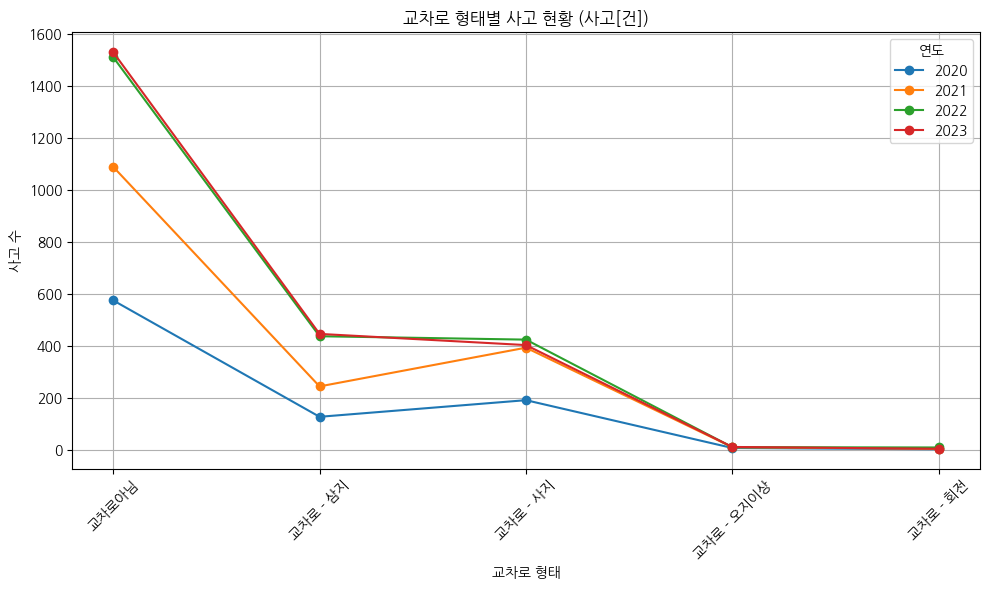

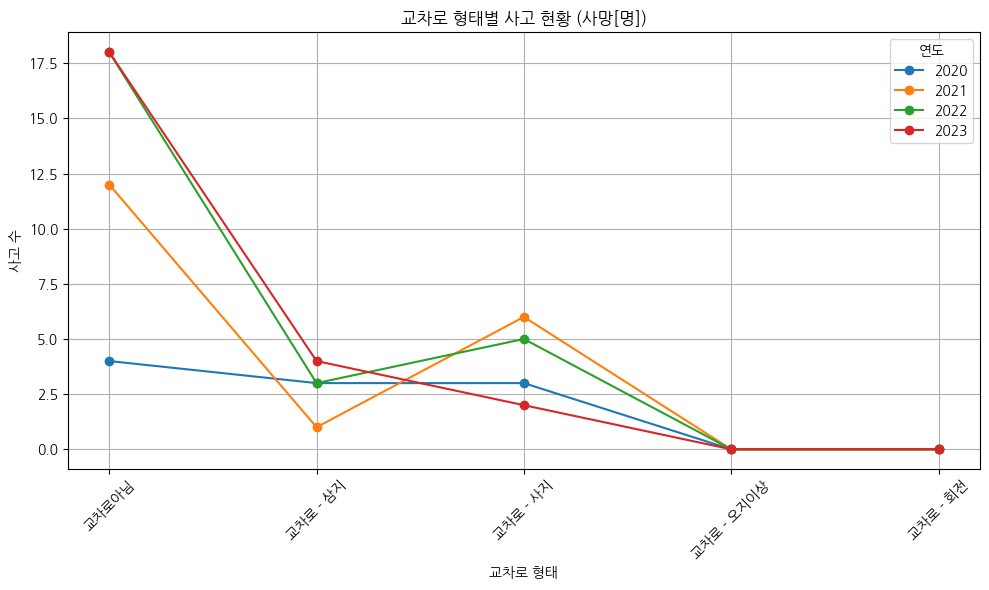

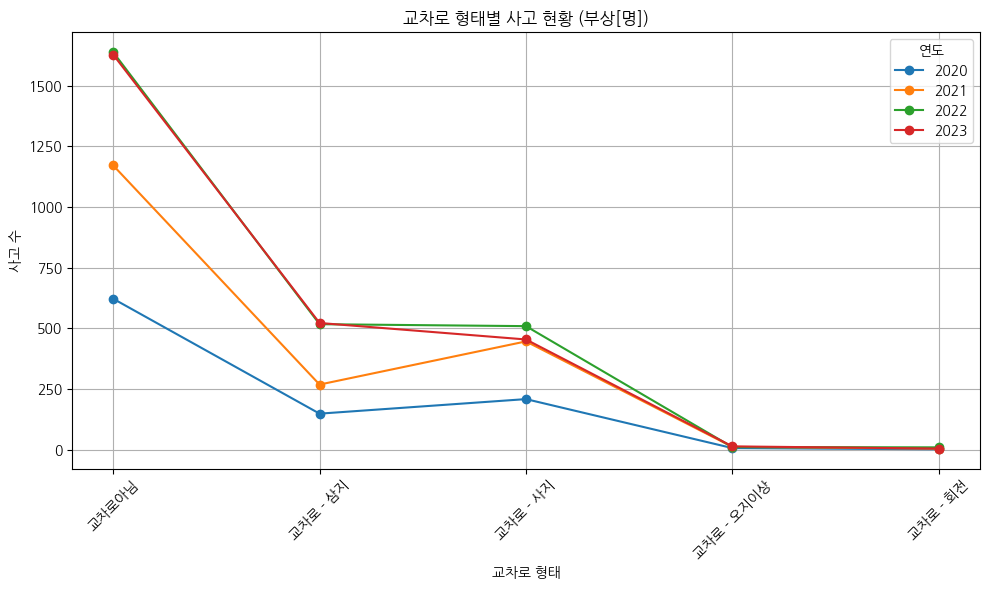

In [72]:
import matplotlib.pyplot as plt

# 나눔고딕 폰트 설정
plt.rc('font', family='NanumGothic')
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

gb = ['사고[건]', '사망[명]', '부상[명]']

for g in gb:
  df = df_temp[df_temp['구분'] == g][['연도', '교차로아님', '교차로 - 삼지', '교차로 - 사지', '교차로 - 오지이상', '교차로 - 회전']]
  df_melted  = df.melt(id_vars=['연도'], var_name='교차로유형', value_name='사고수')
  df_melted['사고수'] = df_melted['사고수'].astype(int)

  # 라인 플롯
  plt.figure(figsize=(10, 6))
  for year in df_melted['연도'].unique():
      subset = df_melted[df_melted['연도'] == year]
      plt.plot(subset['교차로유형'], subset['사고수'], marker='o', label=str(year))

  plt.title('교차로 형태별 사고 현황 (' + g + ')')
  plt.xlabel('교차로 형태')
  plt.ylabel('사고 수')
  plt.legend(title='연도')
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [110]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# 데이터 준비 (df_temp가 이미 존재한다고 가정)
gb = ['사고[건]', '사망[명]', '부상[명]']

# 색상 팔레트 생성
# color_palette = px.colors.sequential.Aggrnyl
# color_palette = px.colors.sequential.Blues[::-1]
color_palette = px.colors.cyclical.HSV[::-1]

# 서브플롯 생성
fig = make_subplots(rows=len(gb), cols=1, subplot_titles=[f'교차로 형태별 사고 현황 ({g})' for g in gb])

for i, g in enumerate(gb, start=1):
    df = df_temp[df_temp['구분'] == g][['연도', '교차로아님', '교차로 - 삼지', '교차로 - 사지', '교차로 - 오지이상', '교차로 - 회전']]
    df_melted = df.melt(id_vars=['연도'], var_name='교차로유형', value_name='사고수')
    df_melted['사고수'] = df_melted['사고수'].astype(int)

    for j, year in enumerate(df_melted['연도'].unique()):
        subset = df_melted[df_melted['연도'] == year]
        color = color_palette[j % len(color_palette)]  # 색상 순환
        fig.add_trace(
            go.Scatter(
                x=subset['교차로유형'],
                y=subset['사고수'],
                mode='lines+markers',
                name=str(year),
                line=dict(color=color),
                marker=dict(color=color),
                showlegend=(i==1)
            ),
            row=i, col=1
        )

    fig.update_xaxes(title_text='교차로 형태', row=i, col=1)
    fig.update_yaxes(title_text='사고 수', row=i, col=1)

# 전체 레이아웃 업데이트
fig.update_layout(
    height=300*len(gb),
    title_text='교차로 형태별 사고 현황',
    legend_title_text='연도',
    font=dict(family='NanumGothic'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# X축과 Y축 눈금 글씨 크기 조정
fig.update_xaxes(tickfont=dict(size=12, family='Arial', color='gray'), tickmode='linear', dtick=5)  # X축 눈금 글씨 크기 설정
fig.update_yaxes(tickfont=dict(size=12, family='Arial', color='gray'))  # Y축 눈금 글씨 크기 설정

# 그래프 표시
fig.show()

In [111]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# 데이터 준비 (df_temp가 이미 존재한다고 가정)
gb = ['사고[건]', '사망[명]', '부상[명]']

# 색상 팔레트 생성
# color_palette = px.colors.sequential.Aggrnyl
color_palette = px.colors.cyclical.HSV[::-1]

# 서브플롯 생성
fig = make_subplots(rows=len(gb), cols=1, subplot_titles=[f'교차로 형태별 사고 현황 ({g})' for g in gb])

for i, g in enumerate(gb, start=1):
    df = df_temp[df_temp['구분'] == g][['연도', '교차로아님', '교차로 - 삼지', '교차로 - 사지', '교차로 - 오지이상', '교차로 - 회전']]
    df_melted = df.melt(id_vars=['연도'], var_name='교차로유형', value_name='사고수')
    df_melted['사고수'] = df_melted['사고수'].astype(int)

    for j, year in enumerate(sorted(df_melted['연도'].unique(), reverse=True)):
        subset = df_melted[df_melted['연도'] == year]
        color = color_palette[j % len(color_palette)]  # 색상 순환
        fig.add_trace(
            go.Bar(
                x=subset['교차로유형'],
                y=subset['사고수'],
                name=str(year),
                marker_color=color,
                showlegend=(i==1)
            ),
            row=i, col=1
        )

    fig.update_xaxes(title_text='교차로 형태', row=i, col=1)
    fig.update_yaxes(title_text='사고 수', row=i, col=1)

# 전체 레이아웃 업데이트
fig.update_layout(
    height=300*len(gb),
    title_text='교차로 형태별 사고 현황',
    legend_title_text='연도',
    font=dict(family='NanumGothic'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    barmode='stack'
)

# X축과 Y축 눈금 글씨 크기 조정
fig.update_xaxes(tickfont=dict(size=12, family='Arial', color='gray'))
fig.update_yaxes(tickfont=dict(size=12, family='Arial', color='gray'))

# 그래프 표시
fig.show()